# Alucel - Análise de vendas

# 0. Configuração

In [2]:
# bibliotecas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose

%matplotlib inline

In [10]:
# função do gráfico de comparação

def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize = (16, 12))

    ax = plt.subplot(3,1,1)
    ax.set_title(titulo, fontsize = 18, loc = 'left')
    sns.lineplot(x = x, y = y1, data = dataset)

    plt.subplot(3,1,2)
    sns.lineplot(x = x, y = y2, data = dataset)

    plt.subplot(3,1,3)
    sns.lineplot(x = x, y = y3, data = dataset)

In [16]:
# função do gráfico

def plotar(titulo, labelx, labely, x, y, dataset):
    sns.set_palette("Accent")
    sns.set_style('darkgrid')

    ax = sns.lineplot(x = x, y = y, data = dataset)

    ax.figure.set_size_inches(12, 6)
    ax.set_title(titulo, loc = 'left', fontsize = 18)
    ax.set_xlabel(labelx, fontsize = 14)
    ax.set_ylabel(labely, fontsize = 14)

    ax = ax

In [3]:
# base de dados

alucel = pd.read_csv("dados/alucel.csv")

# 1. Visão geral e tratamentos

In [5]:
alucel.shape

(61, 2)

In [6]:
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [7]:
alucel['dia'] = pd.to_datetime(alucel['dia'])
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [8]:
alucel.isna().sum().sum()

0

In [9]:
alucel['aumento'] = alucel['vendas'].diff()
alucel['aceleracao'] = alucel['aumento'].diff()
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


# 2. Gráfico de comparação

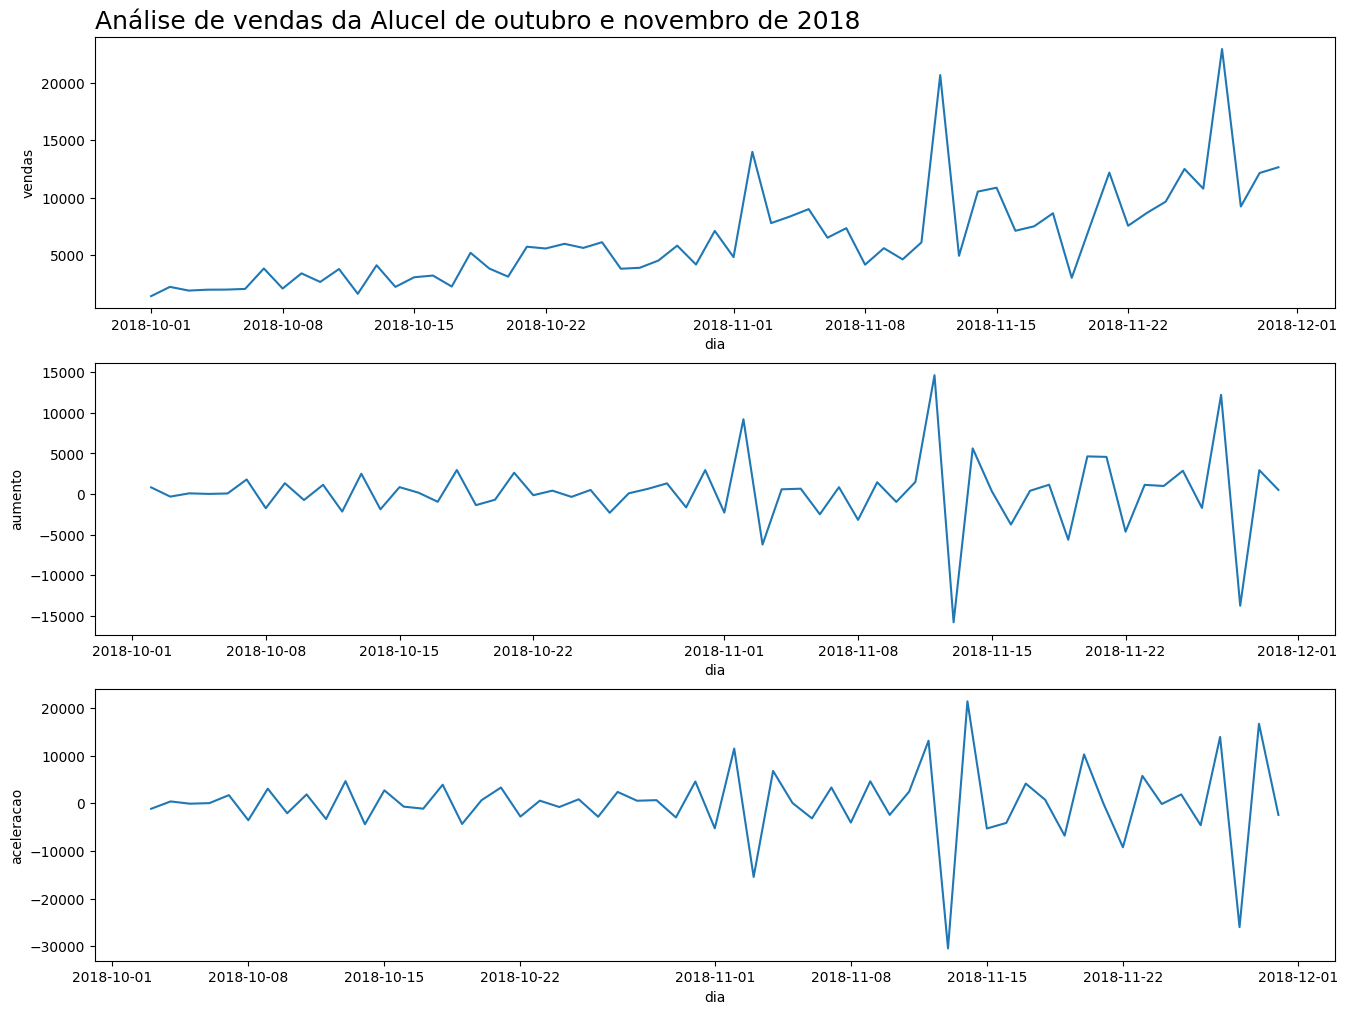

In [13]:
plot_comparacao(x = 'dia',
                y1 = 'vendas',
                y2 = 'aumento',
                y3 = 'aceleracao',
                dataset = alucel,
                titulo = 'Análise de vendas da Alucel de outubro e novembro de 2018')

# 3. Média móvel

In [14]:
alucel['media_movel'] = alucel['vendas'].rolling(7).mean()

In [15]:
alucel.head(20)

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429
7,2018-10-08,2039.59,-1753.48,-3540.66,2252.827143
8,2018-10-09,3365.58,1325.99,3079.47,2421.382857
9,2018-10-10,2616.12,-749.46,-2075.45,2529.348571


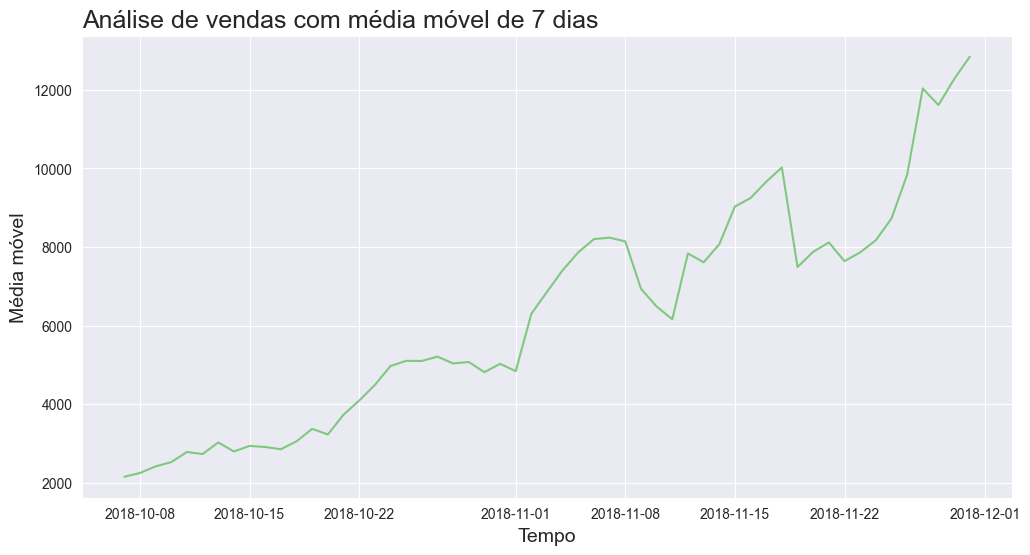

In [17]:
plotar(titulo = "Análise de vendas com média móvel de 7 dias",
       labelx = 'Tempo', labely = "Média móvel", x = 'dia', y = 'media_movel', dataset = alucel)

In [18]:
alucel['media_movel_21'] = alucel['vendas'].rolling(21).mean()

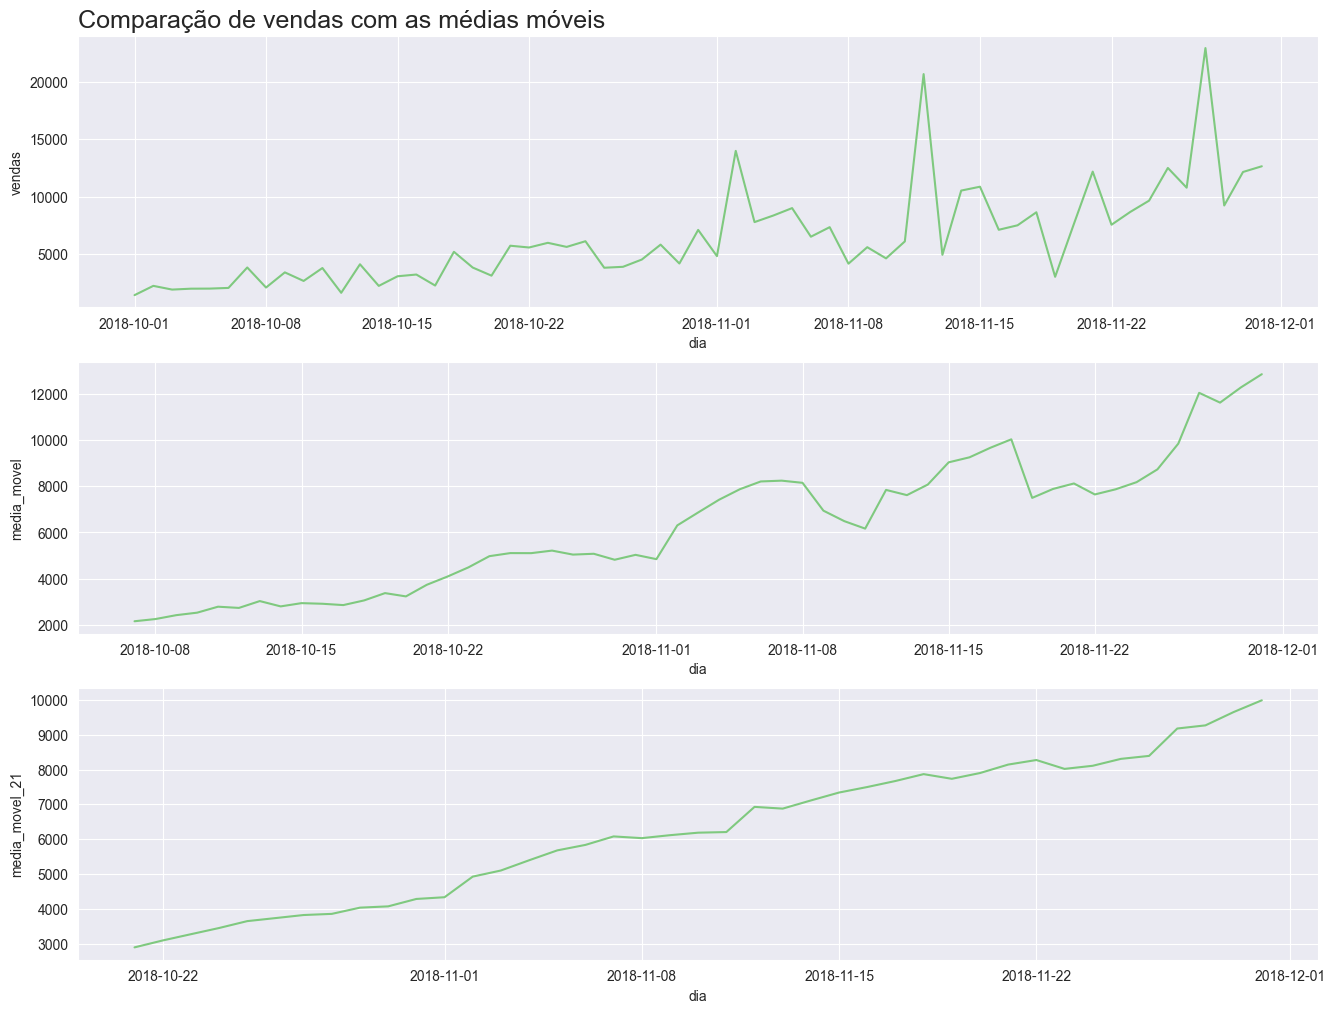

In [19]:
plot_comparacao(x = 'dia',
                y1 = 'vendas',
                y2 = 'media_movel',
                y3 = 'media_movel_21',
                dataset = alucel,
                titulo = "Comparação de vendas com as médias móveis")